<a href="https://colab.research.google.com/github/afifahsuaib/Pemrograman_python/blob/main/TUGAS14_Afifah_Amatulla_Suaib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#numerik to logaritmik
NtL = lambda x: 10*np.log10(x)

In [32]:
#logaritmik to numerik
LtN = lambda x: 10**(x/10)

Fungsi COS231

In [33]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

Parameter

In [34]:
f=1800 #MHz
tipe1='urban'
tipe2='suburban'
tipe3='open'
f1= 700 #MHz
f2= 900 #MHz
f3= 1800 #MHz
tipee= "urban"
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
ptx= 30000 #miliwatt
gtx=10 #dB
grx=2 #dB
BW= 5000000 #Hz
d=np.random.randint(dmin,dmax,N)

# Pathloss

In [35]:
PlUrban=cos(f,tipe1,tower,user,d)
PlOpen=cos(f,tipe3,tower,user,d)
PlSuburban=cos(f,tipe2,tower,user,d)

# Daya Terima (PRx)

In [36]:
def satu(Ptx, Lp, Gtx, Grx):
    Ptxnum= NtL(Ptx)
    Prx=Ptxnum-Lp+Gtx+Grx
    Prxnum=LtN(Prx)

    return Prxnum

PRx pada beberapa daerah

In [37]:
Prxurban=satu(ptx, PlUrban, gtx, grx)
Prxopen=satu(ptx, PlOpen, gtx, grx)
Prxsuburban=satu(ptx, PlSuburban, gtx, grx)

In [38]:
d_sort=d[np.argsort(d)]
Urban_sort=Prxurban[np.argsort(d)]
Open_sort=Prxopen[np.argsort(d)]
Suburban_sort=Prxsuburban[np.argsort(d)]

 Grafik 1a. PRx di f= 1800 MHz

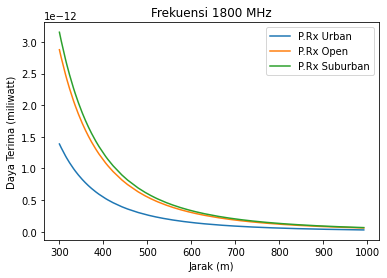

In [39]:
plt.figure()
plt.plot(d_sort,Urban_sort, label= "P.Rx Urban")
plt.plot(d_sort,Open_sort, label= "P.Rx Open")
plt.plot(d_sort,Suburban_sort, label= "P.Rx Suburban")
plt.legend()
plt.title("Frekuensi 1800 MHz")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima (miliwatt)")
plt.show()

In [40]:
Plf1=cos(f1,tipee,tower,user,d)
Plf2=cos(f2,tipee,tower,user,d)
Plf3=cos(f3,tipee,tower,user,d)

PRx pada beberapa frekuensi

In [41]:
Prxf1= satu(ptx, Plf1, gtx, grx)
Prxf2= satu(ptx, Plf2, gtx, grx)
Prxf3= satu(ptx, Plf3, gtx, grx)

In [42]:
d_sort=d[np.argsort(d)]
f1_sort= Prxf1[np.argsort(d)]
f2_sort= Prxf2[np.argsort(d)]
f3_sort= Prxf3[np.argsort(d)]

Grafik 1b. PRx di daerah Urban

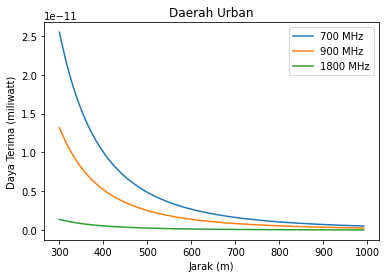

In [43]:
plt.figure()
plt.plot(d_sort,f1_sort, label= "700 MHz")
plt.plot(d_sort,f2_sort, label= "900 MHz")
plt.plot(d_sort,f3_sort, label= "1800 MHz")
plt.legend()
plt.title("Daerah Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Daya Terima (miliwatt)")
plt.show()

# SNR

In [44]:
def dua(Prxnum, bw):
    Noise= -174+NtL(bw)
    Noisenum= LtN(Noise)

    SNR= Prxnum / Noisenum

    return SNR

SNR pada beberapa daerah

In [45]:
SNRurban= dua(Prxurban, BW)
SNRopen= dua(Prxopen, BW)
SNRsuburban= dua(Prxsuburban, BW)

In [46]:
d_sort2=d[np.argsort(d)]
Urban_sort2= SNRurban[np.argsort(d)]
Open_sort2 = SNRopen[np.argsort(d)]
Suburban_sort2 = SNRsuburban[np.argsort(d)]

Grafik 2a. SNR di f= 1800 MHz

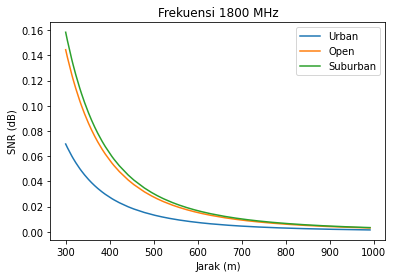

In [47]:
plt.figure()
plt.plot(d_sort2,Urban_sort2, label= "Urban")
plt.plot(d_sort2,Open_sort2, label= "Open")
plt.plot(d_sort2,Suburban_sort2, label= "Suburban")
plt.legend()
plt.title("Frekuensi 1800 MHz")
plt.xlabel("Jarak (m)")
plt.ylabel("SNR (dB)")
plt.show()

SNR pada beberapa frekuensi

In [48]:
SNRf1= dua(Prxf1, BW)
SNRf2= dua(Prxf2, BW)
SNRf3= dua(Prxf3, BW)

In [49]:
d_sort2=d[np.argsort(d)]
f1_sort2= SNRf1[np.argsort(d)]
f2_sort2 = SNRf2[np.argsort(d)]
f3_sort2 = SNRf3[np.argsort(d)]

Grafik 2b. SNR di daerah Urban

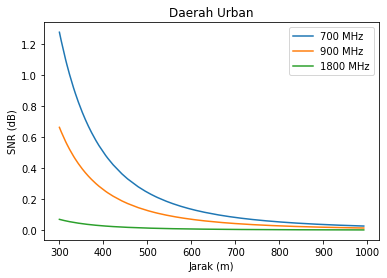

In [50]:
plt.figure()
plt.plot(d_sort2,f1_sort2, label= "700 MHz")
plt.plot(d_sort2,f2_sort2, label= "900 MHz")
plt.plot(d_sort2,f3_sort2, label= "1800 MHz")
plt.legend()
plt.title("Daerah Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("SNR (dB)")
plt.show()

# KAPASITAS

In [51]:
def tiga(SNR, bw):
  
    kap= bw*np.log2(1+SNR)

    return kap

Kapasitasi di beberapa daerah

In [52]:
kapurban= tiga(SNRurban, BW)
kapopen= tiga(SNRopen, BW)
kapsuburban= tiga(SNRsuburban, BW)

In [53]:
d_sort3=d[np.argsort(d)]
Urban_sort3= kapurban[np.argsort(d)]
Open_sort3 = kapopen[np.argsort(d)]
Suburban_sort3 = kapsuburban[np.argsort(d)]

Grafik 3a. Kapasitasi di f= 1800 MHz

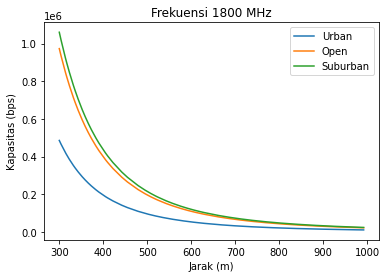

In [54]:
plt.figure()
plt.plot(d_sort3,Urban_sort3, label= "Urban")
plt.plot(d_sort3,Open_sort3, label= "Open")
plt.plot(d_sort3,Suburban_sort3, label= "Suburban")
plt.legend()
plt.title("Frekuensi 1800 MHz")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas (bps)")
plt.show()

Kapasitasi di beberapa frekuensi

In [55]:
kapf1= tiga(SNRf1, BW)
kapf2= tiga(SNRf2, BW)
kapf3= tiga(SNRf3, BW)

In [56]:
d_sort3=d[np.argsort(d)]
f1_sort3= kapf1[np.argsort(d)]
f2_sort3= kapf2[np.argsort(d)]
f3_sort3= kapf3[np.argsort(d)]

Grafik 3b. Kapasitasi di daerah Urban

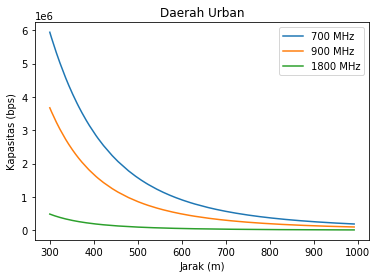

In [57]:
plt.figure()
plt.plot(d_sort3,f1_sort3, label= "700 MHz")
plt.plot(d_sort3,f2_sort3, label= "900 MHz")
plt.plot(d_sort3,f3_sort3, label= "1800 MHz")
plt.legend()
plt.title("Daerah Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("Kapasitas (bps)")
plt.show()